In [1]:
import numpy as np
import random

In [2]:
import tsplib95

In [13]:
with open('dj38.tsp') as f:
     problem= tsplib95.read(f)

In [14]:
class AntColonyTSPLIB:
    def __init__(self, problem, n_ants, n_iterations, alpha=1.0, rho=0.5, Q=100.0, start_node = None):
        self.problem = problem
        self.nodes = list(problem.get_nodes()) # lista de nodos
        self.n_nodes = len(self.nodes) # número de nodos
        self.n_ants = n_ants # número de hormigas
        self.n_iterations = n_iterations # iteraciones
        self.alpha = alpha # alpha >0
        self.rho = rho # (0,1) 
        self.Q = Q # >0
        self.start_node = start_node if start_node is not None else self.nodes[0]

        # Inicializar matriz de feromonas con pequeños valores positivos aleatorios
        base = np.random.rand(self.n_nodes, self.n_nodes) * 1e-4
        self.pheromone = (base + base.T) / 2

    def run(self):
        best_path = None
        best_length = float('inf')

        for iteration in range(self.n_iterations):
            all_paths = []
            all_lengths = []

            for _ in range(self.n_ants):
                path = self.construct_path()
                length = self.path_length(path)

                if length < best_length:
                    best_length = length
                    best_path = path

                all_paths.append(path)
                all_lengths.append(length)

            self.update_pheromones(all_paths, all_lengths)
            
        best_path = [int(node) for node in best_path]

        return best_path, best_length

    def construct_path(self):
        start = self.start_node
        visited = [start]

        current = start
        while len(visited) < self.n_nodes:
            next_node = self.select_next_node(current, visited)
            if next_node is None:  # no hay movimiento posible
                break
            visited.append(next_node)
            current = next_node

        return self.remove_loops(visited)

    def remove_loops(self, path):
        seen = {}
        new_path = []
        for node in path:
            if node in seen:
                loop_start = seen[node]
                new_path = new_path[:loop_start + 1]
            else:
                seen[node] = len(new_path)
                new_path.append(node)
        return new_path
    
    def select_next_node(self, current, visited):
        current_index = self.nodes.index(current) # get index of current node in the node lis
        probabilities = []

        for j in self.nodes:
            if j not in visited:
                j_index = self.nodes.index(j)
                tau = self.pheromone[current_index][j_index] ** self.alpha
                probabilities.append(tau)
            else:
                probabilities.append(0.0)

        total = sum(probabilities)
        if total == 0:
            return None

        probabilities = [p / total for p in probabilities]
        return np.random.choice(self.nodes, p=probabilities) # select next node randomly
        
    def path_length(self, path):
        return sum(self.problem.get_weight(path[i], path[i + 1]) for i in range(len(path) - 1))

    def update_pheromones(self, all_paths, all_lengths):
        # Evaporación
        self.pheromone *= (1 - self.rho)

        for path, length in zip(all_paths, all_lengths):
            for i in range(len(path) - 1):
                u = self.nodes.index(path[i])
                v = self.nodes.index(path[i + 1])
                delta_tau = self.Q / length
                self.pheromone[u][v] += delta_tau
                self.pheromone[v][u] += delta_tau  # Simétrico


In [22]:
import matplotlib.pyplot as plt

def plot_route(best_solution):
    xs = [problem.node_coords[i][0] for i in best_solution]
    ys = [problem.node_coords[i][1] for i in best_solution]
    plt.clf()
    # 'bo-' means blue color, round points, solid lines
    plt.plot(xs,ys,'y--')
    plt.title('Mejor Solución ACO')
    plt.xlabel('X Coordinates')
    plt.ylabel('Y Coordinates')
    plt.show()

In [23]:
from timeit import default_timer as timer
start = timer()
colony = AntColonyTSPLIB(problem, n_ants=10, n_iterations=100, alpha=1.0, rho=0.5)
best_path, best_length = colony.run()
stop = timer()
execution_time = stop - start
print(execution_time)

8.132508599956054


In [24]:
best_length

19229

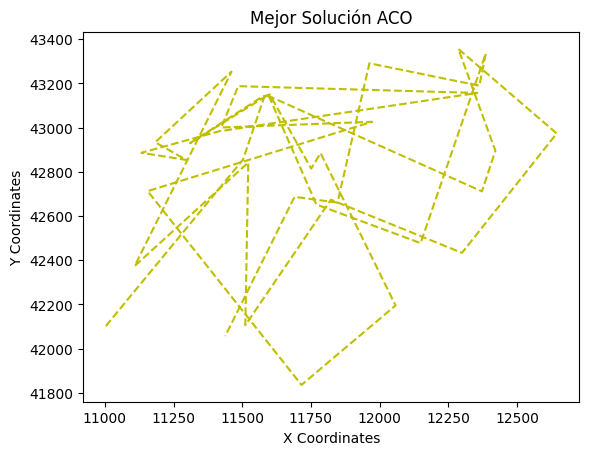

In [25]:
plot_route(best_path)

In [9]:
colony = AntColonyTSPLIB(problem, n_ants=100, n_iterations=100, alpha=1.0, rho=0.5)
best_path, best_length = colony.run()
best_length

17627

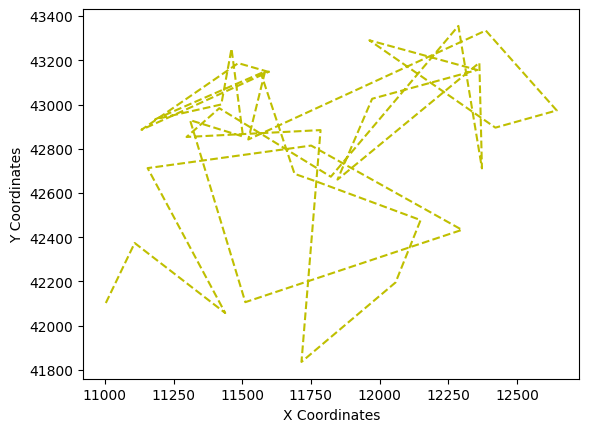

In [10]:
plot_route(best_path)

In [11]:
colony = AntColonyTSPLIB(problem, n_ants=200, n_iterations=200, alpha=1.0, rho=0.2)
best_path, best_length = colony.run()
best_length


KeyboardInterrupt



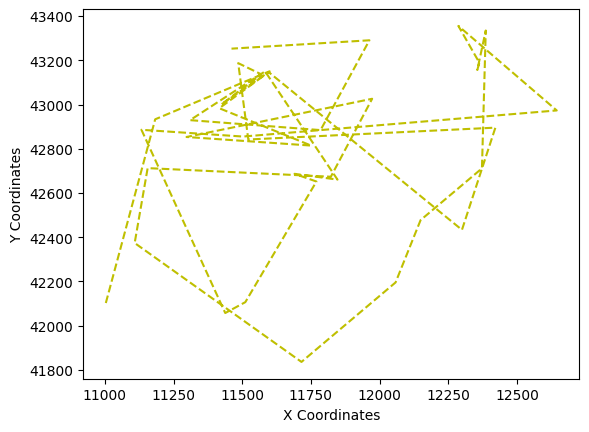

In [95]:
plot_route(best_path)

In [96]:
colony = AntColonyTSPLIB(problem, n_ants=200, n_iterations=200, alpha=2.0, rho=0.2)
best_path, best_length = colony.run()
best_length

21497

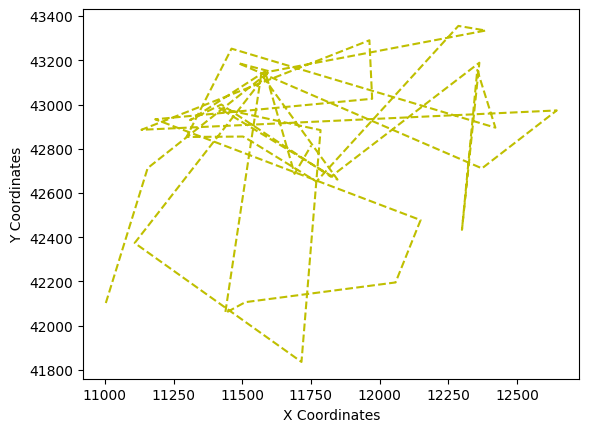

In [97]:
plot_route(best_path)

In [89]:
colony = AntColonyTSPLIB(problem, n_ants=100, n_iterations=100, alpha=2.0, rho=0.1)
best_path, best_length = colony.run()
best_length

20273

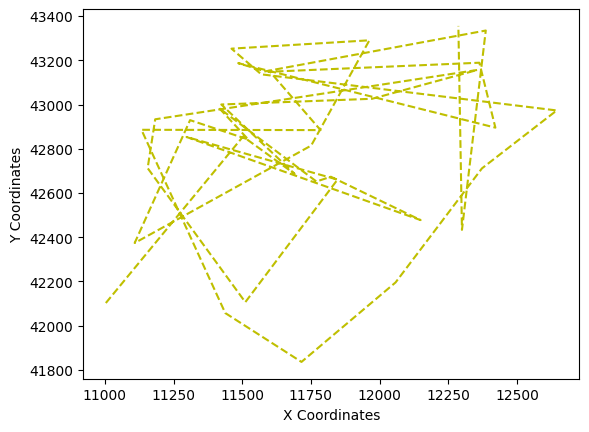

In [90]:
plot_route(best_path)

In [91]:
colony = AntColonyTSPLIB(problem, n_ants=200, n_iterations=100, alpha=3.0, rho=0.1)
best_path, best_length = colony.run()
best_length

22946

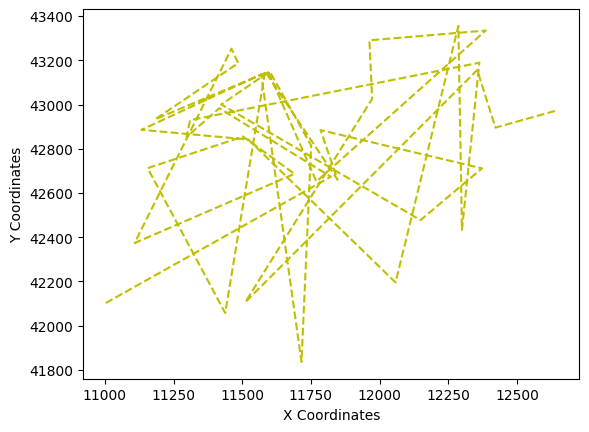

In [92]:
plot_route(best_path)